In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys
import glob
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation= doc['annotation']
annotation_gtf = doc['annotation_gtf']
tss_file = doc['tss_annotation']

tss_annotation = doc['tss_annotation']


import os

import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 15)


In [4]:
import Homer

### Plot the CDF of fraction of genes covered

In [2]:
def to_collapse(curr,collapse_mapping):
    collapse = set()
    for i in curr: 
        collapse.add(collapse_mapping[i])
    return list(collapse)

def create_binary(df,tissues,colname="tissues"):
    bin_df = pd.DataFrame(index=df.index,columns=tissues,dtype=bool)
    bin_df[:] = False
    for ind,val in tqdm.tqdm(df.iterrows()):
        bin_df.loc[ind,val["tissues"]] = True
        
    return bin_df

In [3]:
[tissue_map,tissue_map_short]= pickle.load(open("Results/tissue_map.p","rb"))

In [5]:
f_in = 'Results/tss_annotation/geneID_df_02.p' 
gene = pickle.load(open(f_in,"rb"))
gene["tissues"] = gene["samples"].apply(lambda x: to_collapse(x,tissue_map_short))
gene_bin = create_binary(gene,tissues,colname="tissues")

8874it [04:50, 30.54it/s]
0it [00:00, ?it/s]
1it [00:00,  9.74it/s]
7it [00:00, 12.99it/s]
12it [00:00, 16.55it/s]
20it [00:00, 21.46it/s]
26it [00:00, 26.39it/s]
32it [00:00, 31.46it/s]
38it [00:00, 36.07it/s]
44it [00:00, 39.15it/s]
51it [00:00, 44.79it/s]
59it [00:01, 50.78it/s]
66it [00:01, 50.10it/s]
72it [00:01, 47.46it/s]
78it [00:01, 40.66it/s]
84it [00:01, 44.10it/s]
90it [00:01, 47.30it/s]
96it [00:01, 49.50it/s]
102it [00:01, 51.37it/s]
108it [00:02, 52.86it/s]
114it [00:02, 53.66it/s]
120it [00:02, 54.54it/s]
126it [00:02, 55.09it/s]
132it [00:02, 54.69it/s]
138it [00:02, 55.07it/s]
144it [00:02, 55.33it/s]
151it [00:02, 57.43it/s]
158it [00:02, 59.29it/s]
167it [00:03, 64.17it/s]
174it [00:03, 63.24it/s]
181it [00:03, 61.12it/s]
189it [00:03, 65.50it/s]
197it [00:03, 68.71it/s]
205it [00:03, 63.23it/s]
212it [00:03, 60.86it/s]
219it [00:03, 58.46it/s]
227it [00:04, 63.44it/s]
236it [00:04, 69.55it/s]
245it [00:04, 73.60it/s]
253it [00:04, 70.21it/s]
261it [00:04, 66.28it/s

2136it [00:33, 62.24it/s]
2143it [00:33, 60.21it/s]
2150it [00:33, 58.78it/s]
2159it [00:33, 65.51it/s]
2168it [00:34, 71.31it/s]
2176it [00:34, 68.23it/s]
2184it [00:34, 66.57it/s]
2193it [00:34, 71.73it/s]
2201it [00:34, 67.32it/s]
2208it [00:34, 62.98it/s]
2215it [00:34, 59.87it/s]
2222it [00:34, 58.44it/s]
2228it [00:34, 56.62it/s]
2234it [00:35, 56.35it/s]
2240it [00:35, 56.97it/s]
2249it [00:35, 63.57it/s]
2258it [00:35, 67.21it/s]
2265it [00:35, 63.42it/s]
2272it [00:35, 60.30it/s]
2279it [00:35, 59.26it/s]
2288it [00:35, 65.80it/s]
2295it [00:36, 66.20it/s]
2302it [00:36, 62.31it/s]
2309it [00:36, 61.42it/s]
2317it [00:36, 65.58it/s]
2325it [00:36, 68.64it/s]
2333it [00:36, 65.32it/s]
2340it [00:36, 62.02it/s]
2347it [00:36, 59.53it/s]
2354it [00:36, 60.35it/s]
2363it [00:37, 66.03it/s]
2371it [00:37, 69.20it/s]
2379it [00:37, 68.40it/s]
2386it [00:37, 64.70it/s]
2393it [00:37, 57.45it/s]
2401it [00:37, 62.41it/s]
2409it [00:37, 66.56it/s]
2416it [00:37, 62.85it/s]
2423it [00:3

4265it [01:06, 63.94it/s]
4274it [01:06, 69.87it/s]
4282it [01:07, 66.14it/s]
4289it [01:07, 63.81it/s]
4298it [01:07, 69.61it/s]
4306it [01:07, 68.33it/s]
4314it [01:07, 63.84it/s]
4321it [01:07, 60.21it/s]
4328it [01:07, 58.36it/s]
4336it [01:07, 62.50it/s]
4345it [01:08, 67.35it/s]
4352it [01:08, 58.00it/s]
4359it [01:08, 57.47it/s]
4368it [01:08, 63.45it/s]
4376it [01:08, 67.27it/s]
4384it [01:08, 67.93it/s]
4392it [01:08, 67.54it/s]
4399it [01:08, 67.04it/s]
4408it [01:09, 71.60it/s]
4417it [01:09, 74.19it/s]
4425it [01:09, 68.04it/s]
4433it [01:09, 63.23it/s]
4440it [01:09, 61.44it/s]
4447it [01:09, 59.91it/s]
4454it [01:09, 57.83it/s]
4460it [01:09, 57.18it/s]
4467it [01:09, 58.71it/s]
4476it [01:10, 65.02it/s]
4483it [01:10, 65.82it/s]
4490it [01:10, 64.75it/s]
4497it [01:10, 62.07it/s]
4504it [01:10, 62.31it/s]
4511it [01:10, 63.28it/s]
4518it [01:10, 64.76it/s]
4525it [01:10, 56.94it/s]
4532it [01:11, 59.74it/s]
4539it [01:11, 61.92it/s]
4548it [01:11, 67.99it/s]
4556it [01:1

6319it [01:39, 69.80it/s]
6327it [01:39, 69.63it/s]
6335it [01:40, 64.46it/s]
6342it [01:40, 62.56it/s]
6349it [01:40, 63.13it/s]
6358it [01:40, 68.67it/s]
6366it [01:40, 65.15it/s]
6373it [01:40, 63.81it/s]
6381it [01:40, 67.56it/s]
6389it [01:40, 68.97it/s]
6397it [01:41, 65.29it/s]
6404it [01:41, 62.07it/s]
6411it [01:41, 59.69it/s]
6418it [01:41, 61.11it/s]
6425it [01:41, 63.08it/s]
6434it [01:41, 68.55it/s]
6442it [01:41, 70.24it/s]
6450it [01:41, 65.15it/s]
6458it [01:41, 68.54it/s]
6466it [01:42, 65.97it/s]
6473it [01:42, 62.45it/s]
6480it [01:42, 59.27it/s]
6488it [01:42, 63.71it/s]
6495it [01:42, 58.93it/s]
6502it [01:42, 57.49it/s]
6510it [01:42, 61.54it/s]
6518it [01:42, 65.99it/s]
6525it [01:43, 62.45it/s]
6532it [01:43, 59.99it/s]
6539it [01:43, 59.25it/s]
6547it [01:43, 63.78it/s]
6556it [01:43, 67.57it/s]
6563it [01:43, 64.05it/s]
6570it [01:43, 61.30it/s]
6577it [01:43, 59.60it/s]
6584it [01:44, 58.01it/s]
6590it [01:44, 55.90it/s]
6596it [01:44, 54.95it/s]
6602it [01:4

8362it [02:12, 67.54it/s]
8370it [02:13, 69.10it/s]
8378it [02:13, 63.54it/s]
8385it [02:13, 61.67it/s]
8393it [02:13, 65.31it/s]
8402it [02:13, 70.39it/s]
8411it [02:13, 73.60it/s]
8419it [02:13, 68.10it/s]
8427it [02:13, 67.61it/s]
8436it [02:14, 72.44it/s]
8444it [02:14, 67.26it/s]
8451it [02:14, 64.03it/s]
8458it [02:14, 61.86it/s]
8466it [02:14, 65.53it/s]
8473it [02:14, 66.07it/s]
8480it [02:14, 63.24it/s]
8487it [02:14, 60.76it/s]
8494it [02:14, 59.41it/s]
8502it [02:15, 62.82it/s]
8511it [02:15, 67.38it/s]
8518it [02:15, 63.12it/s]
8525it [02:15, 58.91it/s]
8532it [02:15, 61.04it/s]
8541it [02:15, 67.09it/s]
8549it [02:15, 67.94it/s]
8556it [02:15, 63.65it/s]
8563it [02:16, 63.55it/s]
8572it [02:16, 69.01it/s]
8580it [02:16, 68.89it/s]
8588it [02:16, 64.62it/s]
8595it [02:16, 61.02it/s]
8602it [02:16, 60.18it/s]
8611it [02:16, 66.08it/s]
8618it [02:16, 61.66it/s]
8625it [02:16, 58.56it/s]
8632it [02:17, 59.46it/s]
8640it [02:17, 64.32it/s]
8647it [02:17, 64.54it/s]
8654it [02:1

10419it [02:45, 64.31it/s]
10427it [02:45, 66.18it/s]
10434it [02:45, 63.33it/s]
10441it [02:46, 61.76it/s]
10448it [02:46, 62.19it/s]
10456it [02:46, 65.42it/s]
10465it [02:46, 70.34it/s]
10474it [02:46, 73.86it/s]
10482it [02:46, 72.35it/s]
10491it [02:46, 74.18it/s]
10500it [02:46, 77.02it/s]
10508it [02:46, 74.59it/s]
10516it [02:47, 68.73it/s]
10524it [02:47, 64.56it/s]
10531it [02:47, 61.41it/s]
10538it [02:47, 61.42it/s]
10545it [02:47, 58.43it/s]
10551it [02:47, 57.53it/s]
10557it [02:47, 56.35it/s]
10565it [02:47, 61.06it/s]
10574it [02:48, 65.23it/s]
10581it [02:48, 62.19it/s]
10588it [02:48, 57.74it/s]
10594it [02:48, 55.40it/s]
10600it [02:48, 53.95it/s]
10607it [02:48, 57.60it/s]
10616it [02:48, 62.31it/s]
10623it [02:48, 60.90it/s]
10630it [02:49, 61.62it/s]
10638it [02:49, 66.07it/s]
10645it [02:49, 61.97it/s]
10652it [02:49, 59.79it/s]
10659it [02:49, 58.00it/s]
10667it [02:49, 62.03it/s]
10675it [02:49, 66.32it/s]
10682it [02:49, 64.57it/s]
10689it [02:49, 61.78it/s]
1

12387it [03:17, 60.27it/s]
12395it [03:17, 62.54it/s]
12402it [03:17, 60.68it/s]
12409it [03:17, 59.03it/s]
12416it [03:17, 60.00it/s]
12423it [03:17, 58.94it/s]
12429it [03:18, 58.04it/s]
12435it [03:18, 56.90it/s]
12442it [03:18, 59.08it/s]
12450it [03:18, 63.94it/s]
12458it [03:18, 67.30it/s]
12465it [03:18, 63.39it/s]
12472it [03:18, 61.17it/s]
12481it [03:18, 67.19it/s]
12488it [03:18, 67.25it/s]
12495it [03:19, 64.14it/s]
12502it [03:19, 61.18it/s]
12509it [03:19, 59.09it/s]
12516it [03:19, 58.85it/s]
12524it [03:19, 62.14it/s]
12531it [03:19, 64.08it/s]
12538it [03:19, 61.78it/s]
12545it [03:19, 59.37it/s]
12552it [03:20, 58.41it/s]
12558it [03:20, 57.49it/s]
12564it [03:20, 57.10it/s]
12570it [03:20, 56.30it/s]
12576it [03:20, 55.17it/s]
12584it [03:20, 60.75it/s]
12592it [03:20, 64.32it/s]
12599it [03:20, 62.10it/s]
12606it [03:20, 61.00it/s]
12615it [03:21, 65.10it/s]
12623it [03:21, 68.56it/s]
12632it [03:21, 69.18it/s]
12640it [03:21, 64.70it/s]
12647it [03:21, 61.78it/s]
1

14384it [03:49, 57.80it/s]
14391it [03:49, 59.99it/s]
14398it [03:49, 58.65it/s]
14404it [03:49, 56.36it/s]
14413it [03:49, 62.16it/s]
14421it [03:49, 64.06it/s]
14428it [03:50, 61.88it/s]
14435it [03:50, 59.91it/s]
14443it [03:50, 64.50it/s]
14451it [03:50, 67.13it/s]
14458it [03:50, 67.09it/s]
14465it [03:50, 64.54it/s]
14472it [03:50, 65.33it/s]
14480it [03:50, 67.91it/s]
14487it [03:50, 67.59it/s]
14494it [03:51, 64.15it/s]
14501it [03:51, 60.96it/s]
14508it [03:51, 62.59it/s]
14516it [03:51, 66.09it/s]
14523it [03:51, 63.98it/s]
14530it [03:51, 60.73it/s]
14537it [03:51, 57.87it/s]
14545it [03:51, 61.02it/s]
14553it [03:52, 64.62it/s]
14560it [03:52, 62.21it/s]
14567it [03:52, 58.10it/s]
14574it [03:52, 61.01it/s]
14583it [03:52, 65.44it/s]
14590it [03:52, 63.08it/s]
14597it [03:52, 60.75it/s]
14605it [03:52, 64.11it/s]
14614it [03:52, 69.39it/s]
14622it [03:53, 63.68it/s]
14629it [03:53, 60.79it/s]
14636it [03:53, 60.70it/s]
14644it [03:53, 63.08it/s]
14652it [03:53, 67.30it/s]
1

16311it [04:21, 56.34it/s]
16317it [04:21, 54.26it/s]
16324it [04:21, 56.99it/s]
16331it [04:21, 58.10it/s]
16337it [04:21, 55.78it/s]
16343it [04:21, 54.50it/s]
16349it [04:21, 54.01it/s]
16356it [04:21, 56.41it/s]
16362it [04:21, 53.77it/s]
16369it [04:22, 57.71it/s]
16377it [04:22, 60.84it/s]
16384it [04:22, 62.23it/s]
16391it [04:22, 63.75it/s]
16398it [04:22, 60.33it/s]
16405it [04:22, 54.76it/s]
16411it [04:22, 53.96it/s]
16417it [04:22, 54.23it/s]
16423it [04:23, 54.74it/s]
16429it [04:23, 54.71it/s]
16435it [04:23, 54.96it/s]
16441it [04:23, 56.38it/s]
16447it [04:23, 49.30it/s]
16453it [04:23, 43.43it/s]
16458it [04:23, 40.00it/s]
16463it [04:23, 41.92it/s]
16468it [04:24, 43.48it/s]
16473it [04:24, 43.97it/s]
16478it [04:24, 41.32it/s]
16483it [04:24, 40.28it/s]
16488it [04:24, 39.91it/s]
16493it [04:24, 39.79it/s]
16499it [04:24, 43.14it/s]
16504it [04:24, 43.50it/s]
16510it [04:25, 44.08it/s]
16516it [04:25, 46.96it/s]
16522it [04:25, 48.26it/s]
16528it [04:25, 49.81it/s]
1

18108it [04:53, 54.58it/s]
18116it [04:53, 59.49it/s]
18125it [04:53, 65.45it/s]
18134it [04:53, 69.82it/s]
18142it [04:53, 65.20it/s]
18149it [04:53, 61.74it/s]
18156it [04:53, 58.34it/s]
18163it [04:53, 57.86it/s]
18171it [04:53, 61.57it/s]
18178it [04:54, 60.79it/s]
18185it [04:54, 58.09it/s]
18191it [04:54, 54.65it/s]
18198it [04:54, 57.84it/s]
18204it [04:54, 57.34it/s]
18210it [04:54, 52.97it/s]
18216it [04:54, 49.63it/s]
18223it [04:54, 54.16it/s]
18232it [04:55, 58.49it/s]
18239it [04:55, 49.95it/s]
18245it [04:55, 49.33it/s]
18252it [04:55, 53.15it/s]
18261it [04:55, 59.40it/s]
18269it [04:55, 64.25it/s]
18276it [04:55, 62.34it/s]
18283it [04:55, 59.94it/s]
18290it [04:56, 56.93it/s]
18296it [04:56, 55.02it/s]
18302it [04:56, 55.35it/s]
18310it [04:56, 59.70it/s]
18317it [04:56, 60.00it/s]
18324it [04:56, 58.56it/s]
18330it [04:56, 56.62it/s]
18336it [04:56, 55.16it/s]
18342it [04:56, 55.47it/s]
18348it [04:57, 55.58it/s]
18354it [04:57, 51.22it/s]
18360it [04:57, 48.23it/s]
1

19911it [05:25, 55.20it/s]
19919it [05:25, 59.59it/s]
19926it [05:25, 58.68it/s]
19933it [05:25, 58.05it/s]
19941it [05:25, 61.46it/s]
19948it [05:25, 59.04it/s]
19955it [05:25, 57.62it/s]
19961it [05:26, 56.90it/s]
19969it [05:26, 61.22it/s]
19977it [05:26, 64.22it/s]
19984it [05:26, 61.76it/s]
19991it [05:26, 60.05it/s]
19998it [05:26, 60.51it/s]
20007it [05:26, 65.95it/s]
20015it [05:26, 69.19it/s]
20023it [05:27, 66.35it/s]
20031it [05:27, 69.52it/s]
20039it [05:27, 65.56it/s]
20046it [05:27, 61.83it/s]
20055it [05:27, 66.53it/s]
20063it [05:27, 67.26it/s]
20070it [05:27, 63.86it/s]
20077it [05:27, 55.12it/s]
20083it [05:28, 55.44it/s]
20091it [05:28, 58.75it/s]
20098it [05:28, 58.71it/s]
20105it [05:28, 56.59it/s]
20111it [05:28, 55.10it/s]
20118it [05:28, 57.45it/s]
20126it [05:28, 62.08it/s]
20134it [05:28, 64.64it/s]
20141it [05:28, 61.48it/s]
20149it [05:29, 65.12it/s]
20156it [05:29, 64.48it/s]
20163it [05:29, 57.64it/s]
20169it [05:29, 55.51it/s]
20175it [05:29, 45.84it/s]
2

21798it [05:57, 53.30it/s]
21804it [05:57, 54.52it/s]
21813it [05:57, 61.20it/s]
21820it [05:57, 63.07it/s]
21829it [05:57, 67.56it/s]
21836it [05:57, 64.54it/s]
21843it [05:57, 61.79it/s]
21850it [05:58, 59.89it/s]
21857it [05:58, 58.81it/s]
21866it [05:58, 64.81it/s]
21874it [05:58, 67.08it/s]
21882it [05:58, 69.94it/s]
21890it [05:58, 65.67it/s]
21897it [05:58, 63.48it/s]
21906it [05:58, 68.83it/s]
21914it [05:58, 68.86it/s]
21922it [05:59, 65.19it/s]
21929it [05:59, 61.90it/s]
21936it [05:59, 60.61it/s]
21943it [05:59, 60.33it/s]
21951it [05:59, 63.82it/s]
21960it [05:59, 69.36it/s]
21968it [05:59, 66.29it/s]
21975it [05:59, 63.88it/s]
21982it [06:00, 60.96it/s]
21989it [06:00, 60.94it/s]
21996it [06:00, 62.36it/s]
22004it [06:00, 66.01it/s]
22011it [06:00, 62.93it/s]
22018it [06:00, 60.29it/s]
22025it [06:00, 57.85it/s]
22031it [06:00, 55.83it/s]
22037it [06:00, 55.65it/s]
22045it [06:01, 60.20it/s]
22052it [06:01, 52.43it/s]
22058it [06:01, 40.03it/s]
22063it [06:01, 42.54it/s]
2

23749it [06:29, 63.30it/s]
23757it [06:29, 67.31it/s]
23765it [06:29, 67.15it/s]
23772it [06:29, 62.66it/s]
23780it [06:29, 66.37it/s]
23788it [06:29, 69.55it/s]
23796it [06:30, 68.56it/s]
23803it [06:30, 64.33it/s]
23810it [06:30, 62.45it/s]
23819it [06:30, 67.11it/s]
23826it [06:30, 67.31it/s]
23833it [06:30, 64.29it/s]
23840it [06:30, 62.21it/s]
23849it [06:30, 67.68it/s]
23857it [06:30, 69.07it/s]
23865it [06:31, 65.04it/s]
23872it [06:31, 62.86it/s]
23879it [06:31, 63.24it/s]
23888it [06:31, 68.58it/s]
23896it [06:31, 66.23it/s]
23903it [06:31, 62.72it/s]
23911it [06:31, 67.05it/s]
23919it [06:31, 69.59it/s]
23927it [06:32, 65.74it/s]
23934it [06:32, 63.29it/s]
23943it [06:32, 67.90it/s]
23951it [06:32, 68.69it/s]
23958it [06:32, 64.18it/s]
23965it [06:32, 61.59it/s]
23974it [06:32, 67.31it/s]
23981it [06:32, 66.85it/s]
23988it [06:32, 63.20it/s]
23995it [06:33, 60.42it/s]
24003it [06:33, 65.10it/s]
24010it [06:33, 65.51it/s]
24017it [06:33, 62.92it/s]
24024it [06:33, 60.97it/s]
2

In [6]:
## Create CDF of genes

## Steps:
# 1. Create dictionary of tissue combo to number of genes 
# 1. Double for loop and get the pairwise union overlap
# 2. Pop them from list
# 3. While not done with all columns
     #-Loop through and find the next maximum overlap
     #-Add to dictionary
     #-Pop from list
cdf_tissues = []
cdf_number = []
all_cols = list(gene_bin.columns.values)
max_overlap = 0
max_combo = ()
max_num = 0
for i in all_cols:
    for j in all_cols[1:]:
        overlap =  set((gene_bin[gene_bin[i]].index)).union(set((gene_bin[gene_bin[j]].index)))
        if len(overlap) > max_num:
            max_overlap = overlap
            max_num = len(overlap)
            max_combo  = (i,j)
            


cdf_tissues.append(max_combo[np.argmax([gene_bin[max_combo[0]].sum(),gene_bin[max_combo[1]].sum()])])
cdf_tissues.append(max_combo[np.argmin([gene_bin[max_combo[0]].sum(),gene_bin[max_combo[1]].sum()])])

cdf_number.append(max(gene_bin[max_combo[0]].sum(),gene_bin[max_combo[1]].sum()))
cdf_number.append(max_num)

all_cols.remove(max_combo[0])
all_cols.remove(max_combo[1])

while len(all_cols) > 0:
    no_addition = True
    for i in all_cols:
        overlap =  max_overlap.union(set((gene_bin[gene_bin[i]].index)))
        if len(overlap) > max_num:
            max_num = len(overlap)
            max_ind = i
            no_addition = False
    if no_addition:
        break
        
    max_overlap = max_overlap.union(set((gene_bin[gene_bin[max_ind]].index)))
    cdf_tissues.append(max_ind)
    cdf_number.append(max_num)
    all_cols.remove(max_ind)
     
  

In [49]:
cdf_number_gene,cdf_tissues_gene = create_cdf(gene_bin)

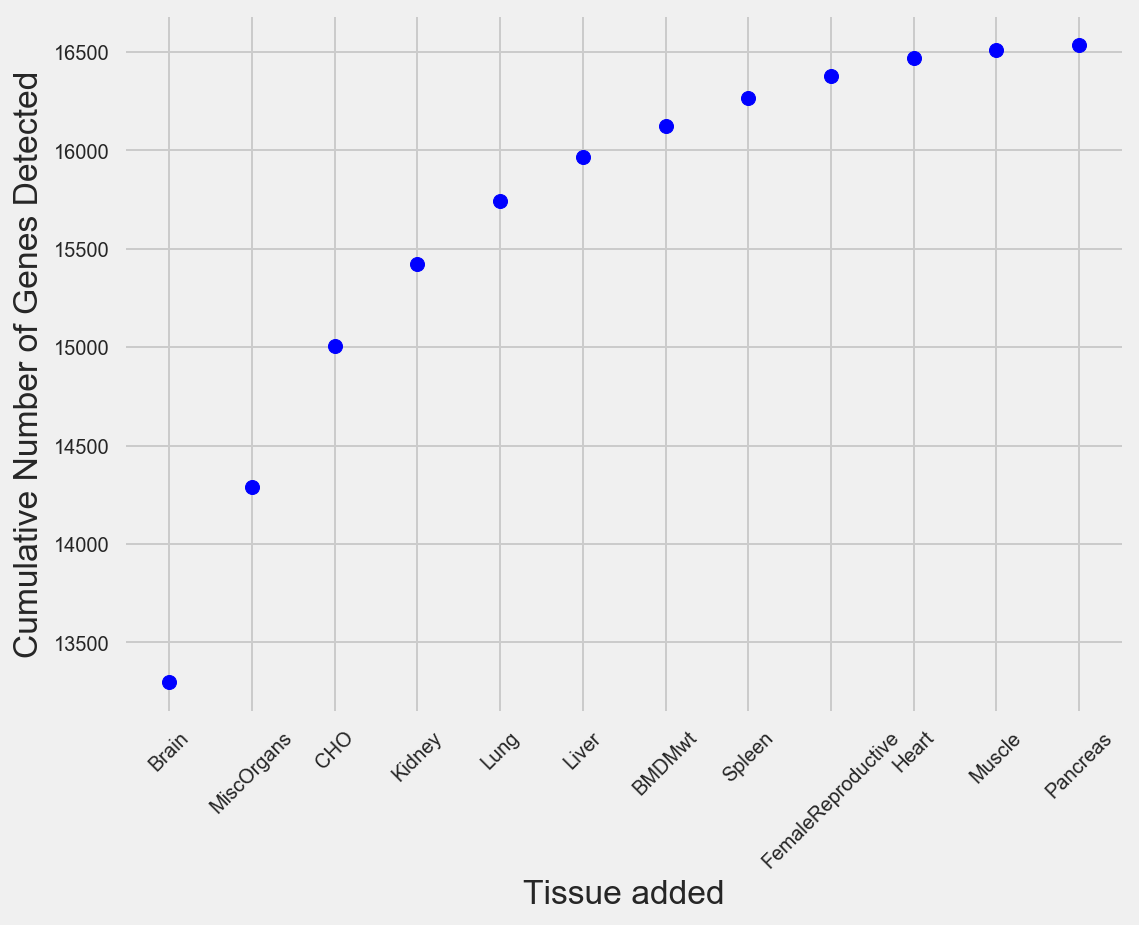

In [51]:
f, ax = plt.subplots()
plt.scatter(np.arange(1,len(cdf_number_gene)+1),cdf_number_gene)
plt.xlabel("Tissue added")
plt.ylabel("Cumulative Number of Genes Detected")
ax.set_xticks(range(1,len(cdf_tissues_gene)+1));
ax.set_xticklabels(cdf_tissues_gene);
ax.tick_params(axis="x",rotation=45)
#plt.xticks(rotation="vertical");
plt.savefig("Results/Figures/cdf_tissues/cdf_geneID_df_02_tissues.png",bbox_inches="tight")

## Enhancers:
1. Enhancer:  
   i. Annotation as intergenic  
   ii. Distance to TSS > 1000  
   iii. Need to handle same strand/divergent transcription  
2. Filter:  
   i. > 1 CPM  
   ii. > 10 CPM ??  
   iii. > 2 tissues  

In [8]:
import annotation
import helper

In [9]:
## Create binary of expression matrix
def create_binary_from_expr(expr_df,threshold=1):
    bin_df = (expr_df > threshold)
    return bin_df

In [10]:
intergenic = pd.read_csv("Results/merged/samples.merge.anno",sep="\t",index_col=0,na_filter=False)
#intergenic["Annotation"].filna(inplace=True)
intergenic = intergenic["Annotation"].str.contains("Intergenic")

expr_df = pd.read_csv("Results/merged/tissues.merge.peaksexpression.log10",sep="\t",index_col = 0)
expr_df = expr_df[expr_df.index.isin(intergenic.index)]
expr_df.head()

,Heart,BMDMwt,Spleen,FemaleReproductive,CHO,Brain,Lung,Liver,MiscOrgans,Muscle,Kidney,Pancreas
0,0.261873,0.755875,0.584573,0.616498,0.672469,1.168983,0.395840,0.710920,1.058075,0.918968,0.821805,0.856388
1,0.335123,1.823474,0.775760,0.417845,1.616393,0.919980,0.356062,0.896105,0.906356,0.887362,1.195095,0.617696
2,0.000000,0.000000,0.000000,0.000000,0.048459,0.000000,0.000000,0.211156,0.000000,0.000000,0.110813,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.029164,0.000000,0.000000,0.187034,0.000000,0.000000,0.156116,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.103864,0.000000,0.000000,0.368390,0.000000,0.000000,0.000000,0.000000


In [11]:
bin_df_enh = create_binary_from_expr(expr_df,threshold=1)

In [12]:
peaks_tissue_merged = helper.merge_columns(peaks_tissue,mapping_dict=tissue_to_peaks)

NameError: name 'peaks_tissue' is not defined

In [13]:
## Create CDF of genes
def create_cdf(bin_df):
    ## Steps:
    # 1. Create dictionary of tissue combo to number of genes 
    # 1. Double for loop and get the pairwise union overlap
    # 2. Pop them from list
    # 3. While not done with all columns
         #-Loop through and find the next maximum overlap
         #-Add to dictionary
         #-Pop from list
    cdf_tissues = []
    cdf_number = []
    all_cols = list(bin_df.columns.values)
    max_overlap = 0
    max_combo = ()
    max_num = 0
    for i in all_cols:
        for j in all_cols[1:]:
            overlap =  set((bin_df[bin_df[i]].index)).union(set((bin_df[bin_df[j]].index)))
            if len(overlap) > max_num:
                max_overlap = overlap
                max_num = len(overlap)
                max_combo  = (i,j)



    cdf_tissues.append(max_combo[np.argmax([bin_df[max_combo[0]].sum(),bin_df[max_combo[1]].sum()])])
    cdf_tissues.append(max_combo[np.argmin([bin_df[max_combo[0]].sum(),bin_df[max_combo[1]].sum()])])

    cdf_number.append(max(bin_df[max_combo[0]].sum(),bin_df[max_combo[1]].sum()))
    cdf_number.append(max_num)

    all_cols.remove(max_combo[0])
    all_cols.remove(max_combo[1])

    while len(all_cols) > 0:
        no_addition = True
        for i in all_cols:
            overlap =  max_overlap.union(set((bin_df[bin_df[i]].index)))
            if len(overlap) > max_num:
                max_num = len(overlap)
                max_ind = i
                no_addition = False
        if no_addition:
            break

        max_overlap = max_overlap.union(set((bin_df[bin_df[max_ind]].index)))
        cdf_tissues.append(max_ind)
        cdf_number.append(max_num)
        all_cols.remove(max_ind)
    
    return cdf_number,cdf_tissues
  





In [14]:
cdf_number,cdf_tissues = create_cdf(bin_df_enh)

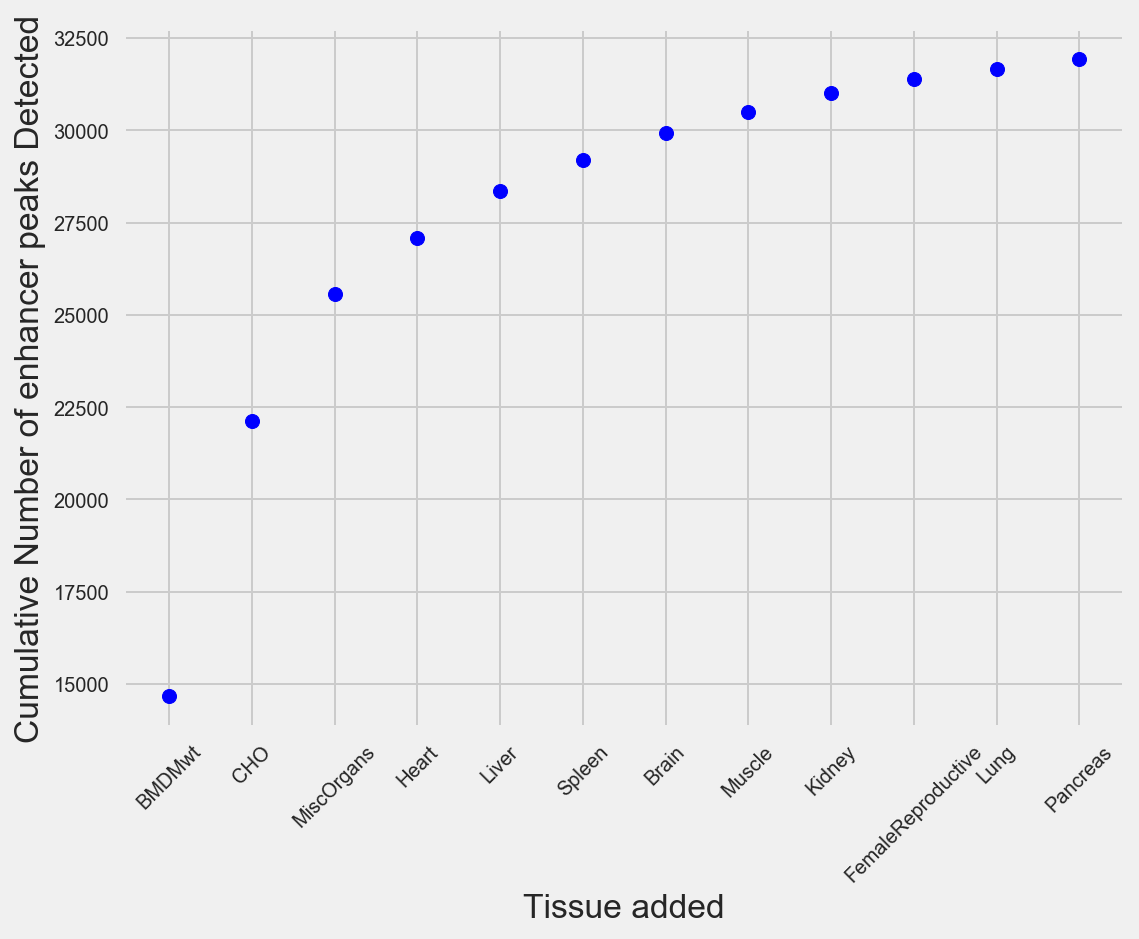

In [47]:
f, ax = plt.subplots()
plt.scatter(np.arange(1,len(cdf_number)+1),cdf_number)
plt.xlabel("Tissue added")
plt.ylabel("Cumulative Number of enhancer peaks Detected")
ax.set_xticks(range(1,len(cdf_tissues)+1));
ax.set_xticklabels(cdf_tissues);
ax.tick_params(axis="x",rotation=45)
#plt.xticks(rotation="vertical");
plt.savefig("Results/Figures/cdf_tissues/cdf_enhancers_tissues.png",bbox_inches="tight")

In [16]:
cdf_tissues

['BMDMwt',
 'CHO',
 'MiscOrgans',
 'Heart',
 'Liver',
 'Spleen',
 'Brain',
 'Muscle',
 'Kidney',
 'FemaleReproductive',
 'Lung',
 'Pancreas']